<a href="https://colab.research.google.com/github/nocwang/salary_MA/blob/main/salary_H1B_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# !wget https://github.com/nocwang/salary_MA/blob/main/LCA_Disclosure_Data_FY2021_Q4-MA.xlsx
import pandas as pd 
# df=pd.read_csv("/content/LCA_Disclosure_Data_FY2021_Q4-MA.csv", error_bad_lines=False)

df=pd.read_excel("/content/LCA_Disclosure_Data_FY2021_Q4-MA.xlsx")

# df = df[df['EMPLOYMENT_START_DATE'].notnull()]
# df = df[df['JOB_TITLE'].notnull()]
# df = df[df['SOC_NAME'].notnull()]
# df = df[df['FULL_TIME_POSITION'].notnull()]
# df = df[df['PW_UNIT_OF_PAY'].notnull()]
# df = df[df['WORKSITE_STATE'].notnull()]
# df = df[df['EMPLOYER_NAME'].notnull()]

In [ ]:
for col in ['JOB_TITLE',]:
    df[col]=df[col].str.upper()
import numpy as np
df['DS'] = np.nan
df.DS[df['JOB_TITLE'].str.contains('DATA SCIENTIST')] = 'DATA SCIENTIST'
df.DS[df['JOB_TITLE'].str.contains('DATA ANALYST')] = 'DATA ANALYST'
df.DS[df['JOB_TITLE'].str.contains('MACHINE LEARNING')] = 'MACHINE LEARNING'
df.DS[df['JOB_TITLE'].str.contains('BUSINESS ANALYST')] = 'BUSINESS ANALYST'
df.DS[df['JOB_TITLE'].str.contains('DEEP LEARNING')] = 'DEEP LEARNING'
df.DS[df['JOB_TITLE'].str.contains('ARTIFICIAL INTELLIGENCE')] = 'ARTIFICIAL INTELLIGENCE'
df.DS[df['JOB_TITLE'].str.contains('BIG DATA')] = 'BIG DATA'
df.DS[df['JOB_TITLE'].str.contains('HADOOP')] = 'HADOOP'
df.DS[df['JOB_TITLE'].str.contains('DATA ENGINEER')] = 'DATA ENGINEER'
df['DS']= df.DS.replace(np.nan, 'Others', regex=True)

In [67]:
df.DS.value_counts()

Others                     4808
DATA SCIENTIST               99
DATA ENGINEER                62
BUSINESS ANALYST             42
DATA ANALYST                 36
MACHINE LEARNING             20
DEEP LEARNING                 1
ARTIFICIAL INTELLIGENCE       1
HADOOP                        1
BIG DATA                      1
Name: DS, dtype: int64

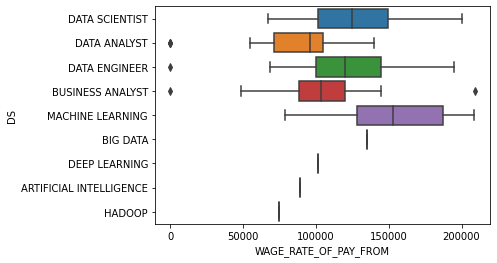

In [72]:
df4=df[~df['DS'].isin(['Others'])]

sns.boxplot(x="WAGE_RATE_OF_PAY_FROM", y='DS',data=df4)

In [30]:
df['WAGE_RATE_OF_PAY_FROM'].describe()

count      5071.000000
mean     106293.547127
std       49363.204054
min          13.750000
25%       80000.000000
50%      103064.000000
75%      131719.060000
max      826875.000000
Name: WAGE_RATE_OF_PAY_FROM, dtype: float64

In [59]:
thresh=df['WAGE_RATE_OF_PAY_FROM'].quantile(0.75) #131719
df1=df.query('WAGE_RATE_OF_PAY_FROM>@thresh')
df1.shape

(1268, 96)

In [45]:
for col in ['JOB_TITLE','WORKSITE_CITY','EMPLOYER_NAME']:
    df1[col]=df1[col].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# most freq jobs

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

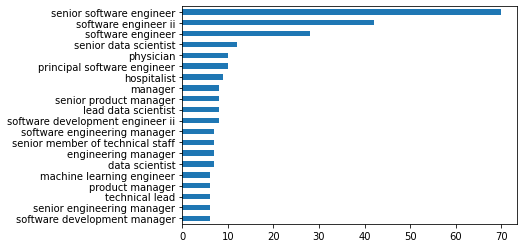

In [46]:
most20=df1['JOB_TITLE'].value_counts().head(20)
most20.sort_values(ascending=True).plot(kind='barh')

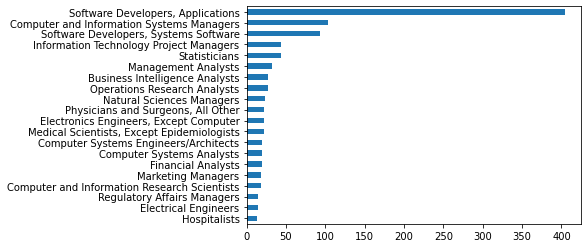

In [60]:
df1['SOC_TITLE'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')

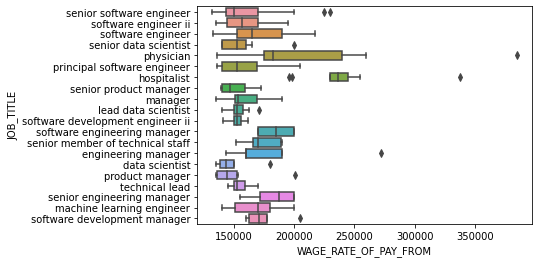

In [54]:
df4=df1[df1['JOB_TITLE'].isin(most20.index)]

sns.boxplot(x="WAGE_RATE_OF_PAY_FROM", y='JOB_TITLE',data=df4,order = most20.index)# whis=np.inf, showfliers=False

# most freq cities

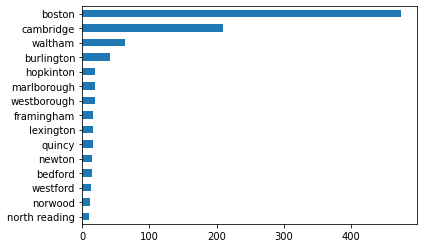

In [47]:
most20_CITY=df1['WORKSITE_CITY'].value_counts().head(15)
most20_CITY.sort_values(ascending=True).plot(kind='barh')

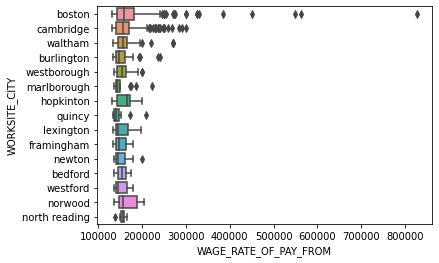

In [57]:
selected=most20_CITY.index
col_select='WORKSITE_CITY'

df4=df1[df1[col_select].isin(selected)]

sns.boxplot(x="WAGE_RATE_OF_PAY_FROM", y=col_select,data=df4,order = selected)#

# Top Employers sponsoring H1-B's in MA
most freq companies

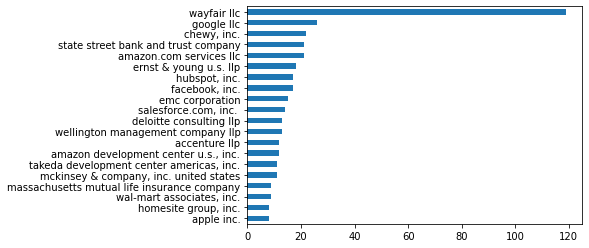

In [48]:
most20C=df1['EMPLOYER_NAME'].value_counts().head(20)
most20C.sort_values(ascending=True).plot(kind='barh')

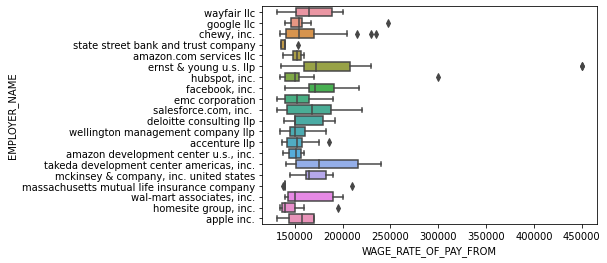

In [58]:
selected=most20C.index
col_select='EMPLOYER_NAME'

df4=df1[df1[col_select].isin(selected)]

sns.boxplot(x="WAGE_RATE_OF_PAY_FROM", y=col_select,data=df4,order = selected)#

In [27]:
df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE',
       'SOC_TITLE', 'FULL_TIME_POSITION', 'BEGIN_DATE', 'END_DATE',
       'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT',
       'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT',
       'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME',
       'TRADE_NAME_DBA', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'NAICS_CODE', 'EMPLOYER_POC_LAST_NAME',
       'EMPLOYER_POC_FIRST_NAME', 'EMPLOYER_POC_MIDDLE_NAME',
       'EMPLOYER_POC_JOB_TITLE', 'EMPLOYER_POC_ADDRESS1',
       'EMPLOYER_POC_ADDRESS2', 'EMPLOYER_POC_CITY', 'EMPLOYER_POC_STATE',
       'EMPLOYER_POC_POSTAL_CODE', 'EMPLOYER_POC_COUNTRY',
       'EMPLOYER_POC_PROVINCE', 'EMPLOYER_POC_PHONE', 'EMPLOYER_POC